In [20]:
import procanCorke as pc

ERobot: PROCaN (by Vitor Domingues), 6 joints (RRRRRR), dynamics
┌─────┬────────┬───────┬────────┬──────────────────────────────────────────────┐
│link │  link  │ joint │ parent │             ETS: parent to link              │
├─────┼────────┼───────┼────────┼──────────────────────────────────────────────┤
│   0 │ lBase  │       │ BASE   │ tx(-0.116)                                   │
│   1 │ link1  │     0 │ lBase  │ tz(0.0294) ⊕ Rz(q0)                          │
│   2 │ link2  │     1 │ link1  │ Rx(90°) ⊕ Rz(q1)                             │
│   3 │ link3  │     2 │ link2  │ tx(0.23) ⊕ Rz(q2)                            │
│   4 │ link4  │     3 │ link3  │ tx(0.08173) ⊕ Ry(-90°) ⊕ Rz(q3)              │
│   5 │ link5  │     4 │ link4  │ tx(-0.0019) ⊕ tz(-0.0904) ⊕ Rx(90°) ⊕ Rz(q4) │
│   6 │ @link6 │     5 │ link5  │ tx(0.0438) ⊕ Ry(90°) ⊕ Rz(q5)                │
└─────┴────────┴───────┴────────┴──────────────────────────────────────────────┘

┌─────┬────────┬────────┬────────┬────────┬

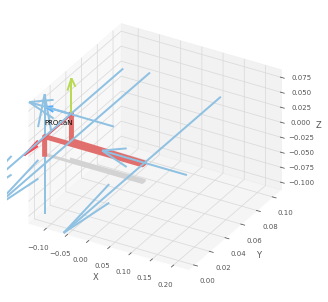

PyPlot3D backend, t = 0.05, scene:
  PROCaN

<Figure size 432x288 with 0 Axes>

In [6]:
import numpy as np
import math
import roboticstoolbox as rtb
from roboticstoolbox import ET, ETS, ERobot
from sympy import Matrix, nsimplify
from spatialmath.base import *
from spatialmath import SE3

pi = math.pi
#d*Rz*a*Rx

Base = SE3(-0.116,0,0)
lBase = rtb.robot.RevoluteDH(a = -0.116, d=0.0294, alpha=0.0, qlim=np.array([-pi/2,pi]),m=2.273,r=[2.727*1e-6,-4.545*1e-6,3.273*1e-6], I=[5.56*1e-2,3.63*1e-2,2.72*1e-2])
#rtb.robot.RevoluteDH(a=-0.116),
link0 = rtb.robot.RevoluteDH(d=0.0294, alpha=pi/2, qlim=np.array([-pi/2,pi]),m=0.33, r=[-8.2*1e-3,-1.6*1e-4,-7.02*1e-3], I=[2.05*1e-3,1.58*1e-3,7.1*1e-4])
link1 = rtb.robot.RevoluteDH(a=0.23, qlim=[0,pi], m=0.201, r=[1.64*1e-2,-2.96*1e-3,-1.12*1e-6], I=[2.45*1e-3,2.27*1e-3,4.55*1e-4])# alpha=pi),
link2 = rtb.robot.RevoluteDH(d=-0.00286, a=0,alpha=-pi/2, offset=pi/2,qlim=[0,pi],flip=True, m=0.279, r=[0.0,7.76*1e-3,0.0], I=[1.28*1e-3,1.09*1e-3,7.06*1e-4])
link3 = rtb.robot.RevoluteDH(d=0.17213,a=0.0019, alpha=pi/2, qlim=[0,pi], m=0.222, r=[7.76*1e-3,0.0,0.0], I=[1.28*1e-3,1.09*1e-3,7.06*1e-4])
link4 = rtb.robot.RevoluteDH(a=0.0438, alpha=-pi/2, qlim=[-pi/2,pi], m=0.099, r=[6.54*1e-3,0.0,-2.08*1e-4], I=[6.05*1e-4,4.5*1e-4,1.96*1e-4])#,
link5 = rtb.robot.RevoluteDH(d = 0, offset=-pi/2, alpha=0, qlim=[-pi,pi],m=0.15, r=[-2.045*1e-2,1.37*1e-4,-9.97*1e-5], I=[5.056*1e-3,3.1*1e-3,1.96*1e-3]) #dY = 0.072

robot = rtb.robot.DHRobot([link0,link1,link2,link3,link4,link5],name="PROCaN", manufacturer="Vitor Domingues", base = Base, gravity=[0,0,0])
robot.addconfiguration_attr("qz", [0.0, 0.0, 0.00, 0, 0, 0])
robot.addconfiguration_attr("qPuma", [0.0, 0.0, 1.57, 0, 0, 0])
robot.addconfiguration_attr("q30", [0.0, pi/6, pi/3, 0, 0, 0])
robot.addconfiguration_attr("q05", [0.0, 0.5, 0.5, 0.5, 0, 0])
robot.addconfiguration_attr("estendido",[0,pi,pi,0,pi/2,0])
robot.plot(robot.qz)
#print(robot)

In [ ]:
'''
import numpy as np

def joint_velocity_vector(K, I):
    return np.sqrt(2 * K*np.linalg.inv(I))# / I)
um = np.eye(3)
K = np.array([um,um,um,um,um,um])#np.array([1., 1., 1., 1., 1., 1.]) # rotational kinetic energies for each joint
I = []
for i in range(6):
    I.append(robot[i].I)
I = np.array([I]) # moments of inertia matrix for each joint

omega = joint_velocity_vector(K, I)
rel = omega*np.linalg.inv(omega[-1][-1])

R = [1.66149432,2.07549809,1.66619446,1.66619446,3.16227766,1]
r = []
rel
'''

In [16]:
M = robot.inertia(robot.estendido)
diag = []
for a in range(len(M)):
    diag.append(M[a][a])
diag = np.array(diag)
omega = 4.74
Ec = diag*(omega**2)/2
Ec = np.ones(6)*3#0.167
qd = np.sqrt(2*Ec/diag)
exp = qd/(qd[-1])

r = [0.12892307, 0.12942363, 0.27997989, 0.64384637, 0.57838762,
       1.        ]
exp

array([0.14007706, 0.14017389, 0.258412  , 1.59871391, 0.61517171,
       1.        ])

In [7]:
M = robot.inertia(robot.estendido)
#DESCOMENTAR PARA COMPUTAR ENERGIA CINETICA
#omega = np.ones(6)#np.array([0.12892307, 0.12942363, 0.27997989, 0.64384637, 0.57838762, 1.])
#K = 0.5*M*(omega**2)
K = np.ones((6,6))
qd2 = 2*K/M#*np.linalg.inv(M)
qd2 = np.sqrt(qd2**2)
qd = np.sqrt(qd2)
rel = qd/(qd[-1])
rel

array([[1.46144137e-01, 1.33531406e-07, 1.33538016e-07, 1.11997227e-08,
        1.42753308e-06, 1.00000000e+00],
       [1.70644774e+01, 1.14898171e-09, 1.91709105e-09, 4.33010702e-01,
        3.93241750e-09, 1.27793738e+08],
       [1.70653222e+01, 1.91709105e-09, 2.52658193e-09, 4.59017579e-01,
        4.25952798e-09, 1.27793738e+08],
       [1.43125442e+00, 4.33010702e-01, 4.59017579e-01, 4.99192661e-09,
        5.04068335e-01, 1.27793738e+08],
       [1.82429788e+02, 3.93241750e-09, 4.25952798e-09, 5.04068335e-01,
        4.56588333e-09, 1.27793738e+08],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00]])

In [13]:
robot.payload(2.0,p=[0,0.072,0])

In [35]:
#ENCONTRANDO VELOCIDADES ÓTIMAS
#from roboticstoolbox.tools import JACOBIAN
import math
pi = math.pi
j1 = 0*math.pi/180
j2 = 15*math.pi/180
j3 = 45*math.pi/180
j4 = 0
j5 = 180*math.pi/180
j6 = 0*math.pi/180
torque = np.array([4.5, 4.5, 3.4, 3.4, 0.2, 0.2])

# Get the current joint configuration
theta = [j1,j2,j3,j4,j5,j6]

qMax = [0,2.43,pi,0,pi/2,0]
# Calculate the Jacobian matrix
#J = JACOBIAN(robot, theta)
J = robot.jacobe(qMax)

# Calculate the optimal joint velocity vector
qd = np.linalg.pinv(J) @ torque
#qd = np.clip(qd, -4.74, 4.74)
#print(qd)
qd

array([   13.32605131, -1747.10976703,  4100.33952011,    -8.50245456,
       -2349.82975308,    10.29212208])

In [ ]:
from spatialmath import SE3

#Tep = SE3.Trans(0.6, -0.3, 0.1) * SE3.OA([0, 1, 0], [0, 0, -1])
tee = robot.fkine(robot.estendido)
Tep = tee#SE3(0.0,0.1,0.3)
sol = robot.ik_lm_chan(Tep)         # solve IK
print(sol)

q_pickup = sol[0]
print(robot.fkine(q_pickup))    # FK shows that desired end-effector pose was achieved

qt = rtb.jtraj(robot.qf, q_pickup, 50)
robot.plot(qt.q, backend='pyplot', movie='procan.gif')

In [5]:
#robot.payload(2.0,p=[0,0.072,0])
robot.payload(0)

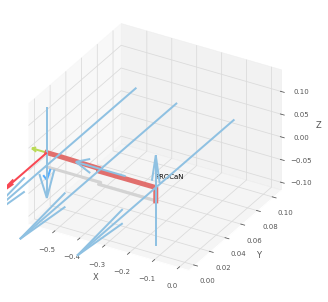

<Figure size 432x288 with 0 Axes>

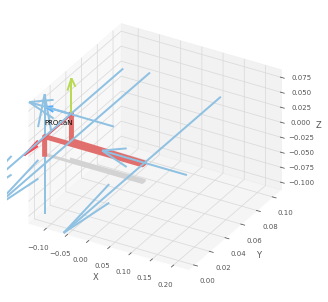

[0.         2.8409815  2.8409815  0.         1.42049075 0.        ]
[0.         2.01026268 2.01026268 0.         1.00513134 0.        ]
[ 0.00000000e+00 -3.55271368e-15 -3.55271368e-15  0.00000000e+00
 -1.77635684e-15  0.00000000e+00]
[0.         1.13132998 1.13132998 0.         0.56566499 0.        ]
[0.         2.52853535 2.52853535 0.         1.26426767 0.        ]
[0.         1.13132998 1.13132998 0.         0.56566499 0.        ]
---------------------
[0.         1.89536213 1.89536213 0.         0.94768106 0.        ]
[0.         0.00083494 0.00083494 0.         0.00041747 0.        ]
[0.         3.14159265 3.14159265 0.         1.57079633 0.        ]
[0.         0.05785832 0.05785832 0.         0.02892916 0.        ]
[0.         1.18847008 1.18847008 0.         0.59423504 0.        ]
[0.         2.52853535 2.52853535 0.         1.26426767 0.        ]
---------------------
[ 3.3797785  25.65949634 13.50865009  0.16552151  0.59754564  0.10625385]
[-0.63096582 -4.19162068  0.7420814

<Figure size 432x288 with 0 Axes>

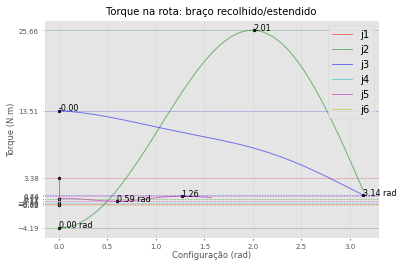

In [15]:
#COMPUTANDO CONFIGURAÇÃO DE TORQUE MÁXIMO:
import numpy as np
import matplotlib.pyplot as plt
import roboticstoolbox as rtb

# Define the start and end configurations
tMax = np.array([4.5, 4.5, 3.4, 3.4, 0.2, 0.2])
q1 = robot.qz#np.array([0, 0, np.pi/2, 0, 0, 0])
q0 = robot.estendido#np.array([0, np.pi, -np.pi/2, 0, np.pi/2, 0])
#qd = np.array([4.74, 4.74, 4.74, 4.74, 4.74, 4.74])#np.array([4.74, 4.74, 4.74, 4.74, 13.08, 13.08])
qd = 13.08*np.ones(6)

qPct = np.zeros(6)# np.array([0.12892307, -0.12942363, 0.27997989, -0.64384637, -0.57838762, 1.])
for i, item in enumerate(qPct):
    qPct[i] = tMax[5]/tMax[i]

#qPct = np.array([0.14614414, 0.14683267, 0.32288135, 0.63793696, 0.5834913 ,1.])

qd = qd*qPct
#qd = np.zeros((6,))
#torque = []
# Create a trajectory from the start to end configurations
traj = rtb.jtraj(q0, q1,100)
qtraj = []
qdtraj = []
# Calculate the torqueeration at each configuration
torque = np.zeros((len(traj), 6))
for i in range(len(traj)):
    q = traj.q[i, :]
    qtraj.append(q)
    
    torque[i, :] = robot.rne(q,qd,np.zeros((6,)))

robot.plot(traj.q, backend='pyplot', movie='procan.gif')
#robot.plot(q0)
robot.plot(q1)
s = 1
cores = ['r','g','b','c','m','y']
max_values = np.amax(torque, axis=0)
max_linhas = np.argmax(torque, axis=0)
min_values = np.amin(torque, axis=0)
min_linhas = np.argmin(torque, axis=0)

max_conf = np.amax(traj.q,axis=0)
min_conf = np.amin(traj.q,axis=0)

fig,ax = plt.subplots()
pLeg = [0,0.1,0.1,0,0.1,0]
#print(max_values,max_linhas)
qtraj = np.array(qtraj)

for p in range(6):
    ax.plot(qtraj[:, p], torque[:, p], linewidth=1,c=cores[p], label="j%d"%(p+1),alpha=0.5)
    ax.scatter(qtraj[max_linhas[p]][p], max_values[p], s=8,c='k')
    ax.scatter(qtraj[min_linhas[p]][p], min_values[p], s=8,c='k')
    if(qtraj[max_linhas[p]][p] != 0):
        ax.text(qtraj[max_linhas[p]][p], max_values[p]+0.01,'%.2f'%(qtraj[max_linhas[p]][p]),size=8)
        #ax.text(0, max_values[p]-pLeg[p],'%.2f N.m'%(max_values[p]),size=8, c=cores[p])
        plt.axhline(y=max_values[p], color=cores[p], linestyle='--', alpha=0.5)
        #plt.axvline(x=qtraj[max_linhas[p]], color=cores[p], linestyle='--', alpha=0.5)
    else:
        plt.axhline(y=max_values[p], color=cores[p], linestyle='--', alpha=0.5)
        #ax.text(qtraj[max_linhas[p]][p], max_values[p]+pLeg[p],'%.2f N.m'%(max_values[p]),size=8, c=cores[p])
        pass
        
    if(qtraj[min_linhas[p]][p] !=0):
        ax.text(qtraj[min_linhas[p]][p], min_values[p]+0.05,'%.2f rad'%(qtraj[min_linhas[p]][p]),size=8)
        #ax.text(qtraj[min_linhas[p]][p]+pLeg[p], min_values[p]-pLeg[p],'%.2f N.m'%(min_values[p]),size=8, c=cores[p])
        plt.axhline(y=min_values[p], color=cores[p], linestyle='--', alpha=0.5)
        #plt.axvline(x=qtraj[min_linhas[p]], color=cores[p], linestyle='--', alpha=0.5)
    else:
        #ax.text(qtraj[min_linhas[p]][p], min_values[p]-pLeg[p],'%.2f N.m'%(min_values[p]),size=8, c=cores[p])
        plt.axhline(y=min_values[p], color=cores[p], linestyle='--', alpha=0.5)
        pass

#PLOTAR CONFIGURAÇÃO COM O MESMO INDICE DOS TORQUES MÁXIMOS E MÍNIMOS



print(qtraj[max_linhas[0]])
print(qtraj[max_linhas[1]])
print(qtraj[max_linhas[2]])
print(qtraj[max_linhas[3]])
print(qtraj[max_linhas[4]])
print(qtraj[max_linhas[5]])
print("---------------------")
print(qtraj[min_linhas[0]])
print(qtraj[min_linhas[1]])
print(qtraj[min_linhas[2]])
print(qtraj[min_linhas[3]])
print(qtraj[min_linhas[4]])
print(qtraj[min_linhas[5]])
print("---------------------")
print(max_values)
print(min_values)
print("---------------------")
print(qd)

#DECIDIR ENTRE AS OPÇÕES DE CONTROLE: CONSTANT,S-SHAPED
ticks = np.append(max_values,min_values) 
plt.yticks(ticks)
plt.xlabel('Configuração (rad)')
plt.ylabel('Torque (N.m)')
plt.title('Torque na rota: braço recolhido/estendido')
ax.legend(fontsize=10)
plt.show()

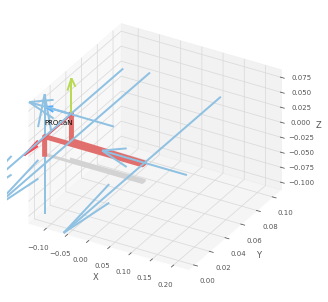

<Figure size 432x288 with 0 Axes>

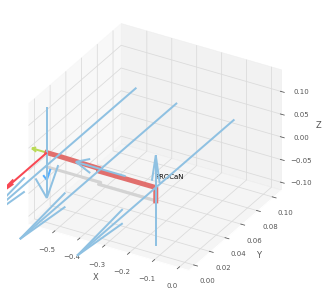

[ 0.          3.14159265 -1.57079633  0.          1.57079633  0.        ]
[0.         0.         1.57079633 0.         0.         0.        ]
[0.         0.         1.57079633 0.         0.         0.        ]
[0.         1.54104842 0.02974791 0.         0.77052421 0.        ]
[0.         0.         1.57079633 0.         0.         0.        ]
[0.         0.         1.57079633 0.         0.         0.        ]
---------------------
[0.         0.         1.57079633 0.         0.         0.        ]
[ 0.          2.43453246 -0.86373613  0.          1.21726623  0.        ]
[ 0.          3.14159265 -1.57079633  0.          1.57079633  0.        ]
[0.         0.         1.57079633 0.         0.         0.        ]
[ 0.          3.14159265 -1.57079633  0.          1.57079633  0.        ]
[ 0.          3.14159265 -1.57079633  0.          1.57079633  0.        ]
---------------------
[ 0.50033369 -0.01944215  0.11145303  0.05975168  0.016552    0.02109753]
[ 0.20626784 -0.12291329 -0.17093556

<Figure size 432x288 with 0 Axes>

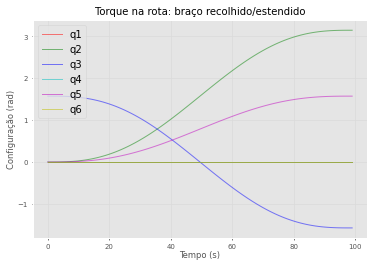

In [62]:
#COMPUTAR CONFIGURAÇÃO/TEMPO
import numpy as np
import matplotlib.pyplot as plt
import roboticstoolbox as rtb

# Define the start and end configurations
q0 = np.array([0, 0, np.pi/2, 0, 0, 0])
q1 = np.array([0, np.pi, -np.pi/2, 0, np.pi/2, 0])
qd = 8.4*np.ones(6)
#qd = np.array([ 1.90777254,  -1.91676066,  4.21490854,  -8.32765953,  -7.61692325, 13.05404777])
qRel = np.array([0.12892307, -0.12942363, 0.27997989, -0.64384637, -0.57838762, 1.])
'''
qRel = np.array([[1.29493427e-01, 6.68579849e-01, 6.68596083e-01, 6.13839805e-03,
        8.66321644e-01, 9.95595442e-01],
       [1.21945274e+01, 7.12720051e-03, 1.14105168e-02, 5.48019489e-03,
        5.34602011e-03, 1.81591113e+01],
       [1.21948235e+01, 1.14105168e-02, 1.54181493e-02, 7.87411639e-03,
        6.16800281e-03, 1.81591113e+01],
       [1.36789610e+00, 6.69549015e-02, 9.62029085e-02, 2.90202594e-03,
        4.76356811e-02, 2.21860999e+02],
       [7.07661716e+01, 2.39422760e-02, 2.76235447e-02, 1.74614719e-02,
        7.11196405e-03, 8.13260044e+01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00]])
'''
qd = qRel*qd
'''
vel = []
for i, item in enumerate(qd):
    vel.append(item[i])
vel = np.array(vel)
'''
vel = qd
#torque = []
# Create a trajectory from the start to end configurations
traj = rtb.jtraj(q0, q1,100)
qtraj = []
qdtraj = []
# Calculate the torqueeration at each configuration
torque = np.zeros((len(traj), 6))
for i in range(len(traj)):
    q = traj.q[i, :]
    qtraj.append(q)
    
    torque[i, :] = robot.rne(q,vel,np.zeros((6,)))

robot.plot(traj.q, backend='pyplot', movie='procan.gif')
#robot.plot(q0)
robot.plot(q1)
s = 1
cores = ['r','g','b','c','m','y']
max_values = np.amax(torque, axis=0)
max_linhas = np.argmax(torque, axis=0)
min_values = np.amin(torque, axis=0)
min_linhas = np.argmin(torque, axis=0)

max_conf = np.amax(traj.q,axis=0)
min_conf = np.amin(traj.q,axis=0)

fig,ax = plt.subplots()
pLeg = [0,0.1,0.1,0,0.1,0]
#print(max_values,max_linhas)
qtraj = np.array(qtraj)

for p in range(6):
    #ax.plot(qtraj[:, p], torque[:, p], linewidth=1,c=cores[p], label="q%d"%(p+1),alpha=0.5)
    #ax.plot(range(100), torque[:, p], linewidth=1,c=cores[p], label="q%d"%(p+1),alpha=0.5)
    ax.plot(range(100),qtraj[:, p], linewidth=1,c=cores[p], label="q%d"%(p+1),alpha=0.5)
    

#PLOTAR CONFIGURAÇÃO COM O MESMO INDICE DOS TORQUES MÁXIMOS E MÍNIMOS



print(qtraj[max_linhas[0]])
print(qtraj[max_linhas[1]])
print(qtraj[max_linhas[2]])
print(qtraj[max_linhas[3]])
print(qtraj[max_linhas[4]])
print(qtraj[max_linhas[5]])
print("---------------------")
print(qtraj[min_linhas[0]])
print(qtraj[min_linhas[1]])
print(qtraj[min_linhas[2]])
print(qtraj[min_linhas[3]])
print(qtraj[min_linhas[4]])
print(qtraj[min_linhas[5]])
print("---------------------")
print(max_values)
print(min_values)

#DECIDIR ENTRE AS OPÇÕES DE CONTROLE: CONSTANT,S-SHAPED
ticks = np.append(max_values,min_values) 
#plt.yticks(ticks)
plt.xlabel('Tempo (s)')
plt.ylabel('Configuração (rad)')
plt.title('Torque na rota: braço recolhido/estendido')
ax.legend(fontsize=10)
plt.show()

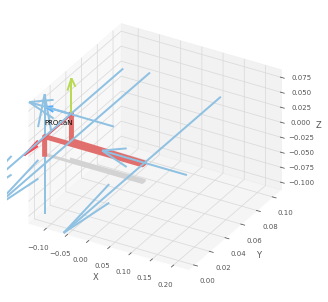

<Figure size 432x288 with 0 Axes>

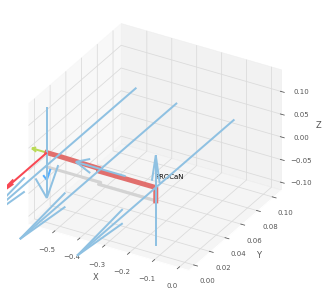

[ 0.          3.14159265 -1.57079633  0.          1.57079633  0.        ]
[0.         0.         1.57079633 0.         0.         0.        ]
[0.         0.         1.57079633 0.         0.         0.        ]
[0.         1.54104842 0.02974791 0.         0.77052421 0.        ]
[0.         0.         1.57079633 0.         0.         0.        ]
[0.         0.         1.57079633 0.         0.         0.        ]
---------------------
[0.         0.         1.57079633 0.         0.         0.        ]
[ 0.          2.43453246 -0.86373613  0.          1.21726623  0.        ]
[ 0.          3.14159265 -1.57079633  0.          1.57079633  0.        ]
[0.         0.         1.57079633 0.         0.         0.        ]
[ 0.          3.14159265 -1.57079633  0.          1.57079633  0.        ]
[ 0.          3.14159265 -1.57079633  0.          1.57079633  0.        ]
---------------------
[ 0.50033369 -0.01944215  0.11145303  0.05975168  0.016552    0.02109753]
[ 0.20626784 -0.12291329 -0.17093556

<Figure size 432x288 with 0 Axes>

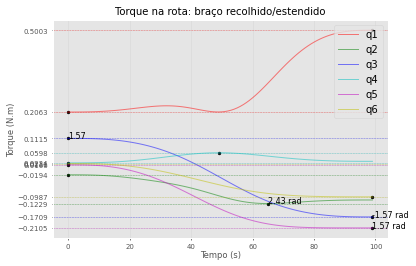

In [61]:
#COMPUTAR TORQUE/TEMPO
import numpy as np
import matplotlib.pyplot as plt
import roboticstoolbox as rtb

# Define the start and end configurations
q0 = np.array([0, 0, np.pi/2, 0, 0, 0])
q1 = np.array([0, np.pi, -np.pi/2, 0, np.pi/2, 0])
qd = 8.4*np.ones(6)
#qd = np.array([ 1.90777254,  -1.91676066,  4.21490854,  -8.32765953,  -7.61692325, 13.05404777])
qRel = np.array([0.12892307, -0.12942363, 0.27997989, -0.64384637, -0.57838762, 1.])
'''
qRel = np.array([[1.29493427e-01, 6.68579849e-01, 6.68596083e-01, 6.13839805e-03,
        8.66321644e-01, 9.95595442e-01],
       [1.21945274e+01, 7.12720051e-03, 1.14105168e-02, 5.48019489e-03,
        5.34602011e-03, 1.81591113e+01],
       [1.21948235e+01, 1.14105168e-02, 1.54181493e-02, 7.87411639e-03,
        6.16800281e-03, 1.81591113e+01],
       [1.36789610e+00, 6.69549015e-02, 9.62029085e-02, 2.90202594e-03,
        4.76356811e-02, 2.21860999e+02],
       [7.07661716e+01, 2.39422760e-02, 2.76235447e-02, 1.74614719e-02,
        7.11196405e-03, 8.13260044e+01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00]])
'''
qd = qRel*qd
'''
vel = []
for i, item in enumerate(qd):
    vel.append(item[i])
vel = np.array(vel)
'''
vel = qd
#torque = []
# Create a trajectory from the start to end configurations
traj = rtb.jtraj(q0, q1,100)
qtraj = []
qdtraj = []
# Calculate the torqueeration at each configuration
torque = np.zeros((len(traj), 6))
for i in range(len(traj)):
    q = traj.q[i, :]
    qtraj.append(q)
    
    torque[i, :] = robot.rne(q,vel,np.zeros((6,)))

robot.plot(traj.q, backend='pyplot', movie='procan.gif')
#robot.plot(q0)
robot.plot(q1)
s = 1
cores = ['r','g','b','c','m','y']
max_values = np.amax(torque, axis=0)
max_linhas = np.argmax(torque, axis=0)
min_values = np.amin(torque, axis=0)
min_linhas = np.argmin(torque, axis=0)

max_conf = np.amax(traj.q,axis=0)
min_conf = np.amin(traj.q,axis=0)

fig,ax = plt.subplots()
pLeg = [0,0.1,0.1,0,0.1,0]
#print(max_values,max_linhas)
qtraj = np.array(qtraj)

for p in range(6):
    #ax.plot(qtraj[:, p], torque[:, p], linewidth=1,c=cores[p], label="q%d"%(p+1),alpha=0.5)
    ax.plot(range(100), torque[:, p], linewidth=1,c=cores[p], label="q%d"%(p+1),alpha=0.5)
    #ax.plot(range(100),qtraj[:, p], linewidth=1,c=cores[p], label="q%d"%(p+1),alpha=0.5)
    #ax.scatter(qtraj[max_linhas[p]][p], max_values[p], s=8,c='k')
    #ax.scatter(qtraj[min_linhas[p]][p], min_values[p], s=8,c='k')
    ax.scatter(max_linhas[p], max_values[p], s=8,c='k')
    ax.scatter(min_linhas[p], min_values[p], s=8,c='k')
    if(qtraj[max_linhas[p]][p] != 0):
        ax.text(max_linhas[p], max_values[p],'%.2f'%(qtraj[max_linhas[p]][p]),size=8)
        #ax.text(0, max_values[p]-pLeg[p],'%.2f N.m'%(max_values[p]),size=8, c=cores[p])
        plt.axhline(y=max_values[p], color=cores[p], linestyle='--', alpha=0.5)
        #plt.axvline(x=qtraj[max_linhas[p]], color=cores[p], linestyle='--', alpha=0.5)
    else:
        plt.axhline(y=max_values[p], color=cores[p], linestyle='--', alpha=0.5)
        #ax.text(qtraj[max_linhas[p]][p], max_values[p]+pLeg[p],'%.2f N.m'%(max_values[p]),size=8, c=cores[p])
        pass
        
    if(qtraj[min_linhas[p]][p] !=0):
        ax.text(min_linhas[p], min_values[p],'%.2f rad'%(qtraj[min_linhas[p]][p]),size=8)
        #ax.text(qtraj[min_linhas[p]][p]+pLeg[p], min_values[p]-pLeg[p],'%.2f N.m'%(min_values[p]),size=8, c=cores[p])
        plt.axhline(y=min_values[p], color=cores[p], linestyle='--', alpha=0.5)
        #plt.axvline(x=qtraj[min_linhas[p]], color=cores[p], linestyle='--', alpha=0.5)
    else:
        #ax.text(qtraj[min_linhas[p]][p], min_values[p]-pLeg[p],'%.2f N.m'%(min_values[p]),size=8, c=cores[p])
        plt.axhline(y=min_values[p], color=cores[p], linestyle='--', alpha=0.5)
        pass

#PLOTAR CONFIGURAÇÃO COM O MESMO INDICE DOS TORQUES MÁXIMOS E MÍNIMOS



print(qtraj[max_linhas[0]])
print(qtraj[max_linhas[1]])
print(qtraj[max_linhas[2]])
print(qtraj[max_linhas[3]])
print(qtraj[max_linhas[4]])
print(qtraj[max_linhas[5]])
print("---------------------")
print(qtraj[min_linhas[0]])
print(qtraj[min_linhas[1]])
print(qtraj[min_linhas[2]])
print(qtraj[min_linhas[3]])
print(qtraj[min_linhas[4]])
print(qtraj[min_linhas[5]])
print("---------------------")
print(max_values)
print(min_values)

#DECIDIR ENTRE AS OPÇÕES DE CONTROLE: CONSTANT,S-SHAPED
ticks = np.append(max_values,min_values) 
plt.yticks(ticks)
plt.xlabel('Tempo (s)')
plt.ylabel('Torque (N.m)')
plt.title('Torque na rota: braço recolhido/estendido')
ax.legend(fontsize=10)
plt.show()

In [ ]:
'''
The most common joint acceleration used in space manipulators varies depending on the specific requirements of the mission and the design of the manipulator. Some common joint accelerations used in space manipulators include:

Constant joint acceleration: In this method, the manipulator joints move at a constant rate, which is usually slow, to avoid sudden changes in velocity and minimize stress on the manipulator structure.

S-shaped joint acceleration: This is a more complex method where the joint acceleration follows an S-shaped curve, with a slow start, an acceleration phase, and a deceleration phase. This method is often used to reduce stress on the manipulator structure and avoid singularities.

Min-jerk joint acceleration: This method minimizes the jerk (the derivative of acceleration) and reduces stress on the manipulator structure. This method is often used in space manipulators because it results in smooth, smooth joint movements.

Joint impedance control: This method uses impedance control to regulate the impedance of each joint, which results in smooth and stable joint movements. This method is often used in space manipulators to maintain stability in the presence of disturbances.

Ultimately, the choice of joint acceleration for a space manipulator depends on the specific requirements of the mission and the design of the manipulator.
'''

In [ ]:

import numpy as np
import roboticstoolbox as rtb

def joint_acceleration_vector(q, qd, qdd, M, C, G):
    """
    Returns the joint acceleration vector of a 6-DOF manipulator
    using joint impedance control.
    
    Parameters:
    - q: joint configuration vector
    - qd: joint velocity vector
    - qdd: joint acceleration vector
    - M: manipulator mass matrix
    - C: manipulator coriolis/centrifugal matrix
    - G: manipulator gravity vector
    
    Returns:
    - qdd_new: joint acceleration vector
    """
    # Desired joint impedance
    Kp = np.array([100, 100, 100, 100, 100, 100])
    Kd = np.array([50, 50, 50, 50, 50, 50])
    
    # Compute joint impedance force
    e = qd - qdd
    F = Kp * e + Kd * qd
    
    # Compute joint acceleration using the accel method
    qdd_new = np.linalg.inv(M) @ (F - C @ qd - G)
    
    return qdd_new



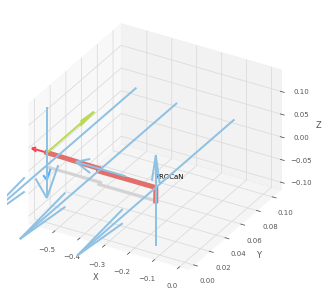

PyPlot3D backend, t = 0.05, scene:
  PROCaN

<Figure size 432x288 with 0 Axes>

In [33]:
q = [0,0,pi,-pi/2,pi,-pi/2]
qz = [0,0,0,0,0,0]
qe = [0,pi,-pi/2,0,pi/2,pi/2]
robot.plot(qe)

In [ ]:
import spatialmath.base.symbolic as sym

q = sym.symbol('q_:6')
robot.inertia(robot.q05)
#robot.r

In [35]:
robot.payload(m=2,p=[0.05,0,0])
#robot.gravload(qe,gravity=[9.81,9.81,9.81])
#robot.accel(qe,[0.1,0.1,0.1,0.1,0.1,0.1],[4.5,4.5,3.43,3.43,0.21,0.21])
robot.accel(qe,[0,0,0,0,0,0],[4.5,4.5,3.43,3.43,0.21,0.21])

array([  33.62300309,  -53.47685628,  320.18467226,  512.60490241,
       -471.08717173,  265.22582567])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


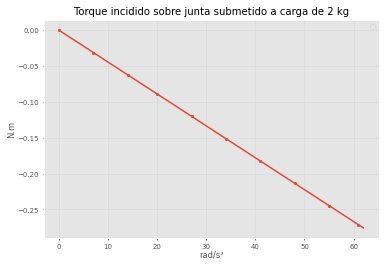

In [43]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
robot.payload(m=2,p=[0.05,0,0])
torques = []
acel = np.arange(0,2*pi,0.1)
v = 10*pi/180
for a in acel:
    torques.append(robot.rne(qe,[v,v,v,v,v,v],[a,a,a,a,a,a]))
torques
tq = pd.DataFrame(torques)
tq

j6 = np.array(tq[5])
plt.ylabel("N.m")
plt.xlabel("rad/s²")
plt.title("Torque incidido sobre junta submetido a carga de 2 kg")
#plt.set_markersize(2)
plt.plot(j6, ms=2,markevery=0.1,marker='o',linewidth=1.5)
plt.axis("tight")
plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


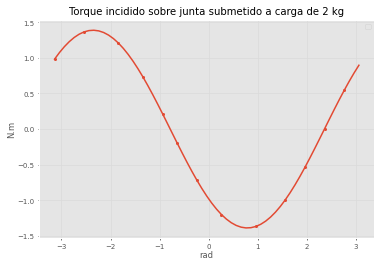

In [10]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
robot.payload(m=2,p=[0.05,0,0])
torques = []
acel = np.arange(0,20,0.1)
Q = np.arange(-pi,pi,0.1)
for q in Q:
    torques.append(robot.gravload([0,pi,-pi/2,0,pi/2,q],gravity=[9.81,9.81,9.81]))
torques
tq = pd.DataFrame(torques,columns=['j1','j2','j3','j4','j5','j6'])
tq
#revisar
pos_min = tq.index[tq['MAPE'] == tq.min(axis=0)[2]][0]

j6 = np.array(tq[5])
plt.ylabel("N.m")
plt.xlabel("rad")
plt.title("Torque incidido sobre junta submetido a carga de 2 kg")
#plt.set_markersize(2)
plt.plot(Q,j6, ms=2,markevery=0.1,marker='o',linewidth=1.5)
plt.axis("tight")
plt.legend()
plt.show()


In [3]:
import math
pi = math.pi
#pc.T_func(0,0,pi,-pi/2,pi)#,-pi/2)    #d*Rz*a*Rx (começa a contar da base)

In [ ]:
q = [0,0,pi,-pi/2,pi,-pi/2]
qr = [0,0,pi/2,0,0,0]
qz = [0,0,pi,0,0,0]
pc.robot.plot(qz)

In [ ]:
import numpy as np
Pa = np.array([[2],[2],[2],[10]])
Pa = Pa/10
pc.T_func(0,0,0,pi)#,pi,-pi/2)@Pa

In [4]:
import roboticstoolbox as rtb
from spatialmath.base import *
from spatialmath import SE3

puma = rtb.models.DH.Puma560(symbolic=True)

In [5]:
puma

DHRobot: Puma 560 (by Unimation), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┌────┬────────┬────────┬───────┬─────────┬────────┐
│θⱼ  │   dⱼ   │   aⱼ   │  ⍺ⱼ   │   q⁻    │   q⁺   │
├────┼────────┼────────┼───────┼─────────┼────────┤
│ q1 │ 0.6718 │      0 │  pi/2 │ -160.0° │ 160.0° │
│ q2 │      0 │ 0.4318 │     0 │ -110.0° │ 110.0° │
│ q3 │   0.15 │ 0.0203 │ -pi/2 │ -135.0° │ 135.0° │
│ q4 │ 0.4318 │      0 │  pi/2 │ -266.0° │ 266.0° │
│ q5 │      0 │      0 │ -pi/2 │ -100.0° │ 100.0° │
│ q6 │      0 │      0 │     0 │ -266.0° │ 266.0° │
└────┴────────┴────────┴───────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬─────┬──────────────────────┬───────────────────────┬─────┬──────────────────────┬─────┐
│name │ q0  │ q1                   │ q2                    │ q3  │ q4                   │ q5  │
├─────┼─────┼──────────────────────┼───────────────────────┼─────┼──────────────────────┼─────┤
│  qr │  0° │ 28.6478897565412*pi° │ -28.6478897565412*pi° │  0° │  0°          

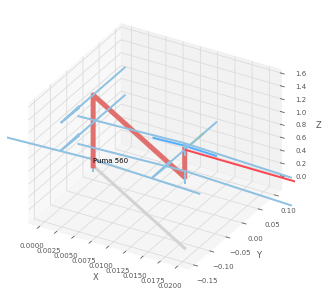

PyPlot3D backend, t = 0.05, scene:
  Puma 560

<Figure size 432x288 with 0 Axes>

In [3]:
puma.plot(puma.qr)
#puma.plot([-0.5,0,0.5,0.5,0,-0.5])

In [ ]:
puma.plot(puma.qz)
#puma.plot([-0.5,0,0.5,0.5,0,-0.5])

In [ ]:
panda = rtb.models.Panda()
panda.plot(panda.q,block=True)

In [ ]:
import roboticstoolbox as rtb

robot = rtb.models.DH.Panda()  # create a robot

pyplot = rtb.backends.PyPlot.PyPlot()  # create a PyPlot backend
pyplot.add(robot)              # add the robot to the backend
robot.q = robot.qz             # set the robot configuration
pyplot.step()                  # update the backend and graphical view

ERobot: PROCaN (by Vitor Domingues), 6 joints (RRRRRR), 2 branches, dynamics
┌─────┬────────┬───────┬────────┬──────────────────────────────────────────────┐
│link │  link  │ joint │ parent │             ETS: parent to link              │
├─────┼────────┼───────┼────────┼──────────────────────────────────────────────┤
│   0 │ link1  │     0 │ BASE   │ tz(0.0294) ⊕ Rz(q0)                          │
│   1 │ @lBase │       │ link1  │ tx(-0.116)                                   │
│   2 │ link2  │     1 │ link1  │ Rx(90°) ⊕ Rz(q1)                             │
│   3 │ link3  │     2 │ link2  │ tx(0.23) ⊕ Rz(q2)                            │
│   4 │ link4  │     3 │ link3  │ tx(0.08173) ⊕ Ry(-90°) ⊕ Rz(q3)              │
│   5 │ link5  │     4 │ link4  │ tx(-0.0019) ⊕ tz(-0.0904) ⊕ Rx(90°) ⊕ Rz(q4) │
│   6 │ @link6 │     5 │ link5  │ tx(0.0438) ⊕ Ry(90°) ⊕ Rz(q5)                │
└─────┴────────┴───────┴────────┴──────────────────────────────────────────────┘

┌─────┬────────┬────────┬──────

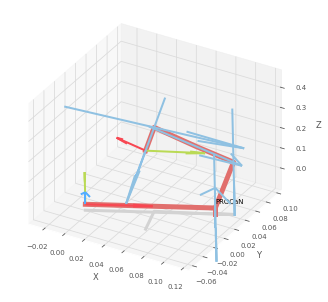

<Figure size 432x288 with 0 Axes>

In [5]:
#DESCRIÇÃO DO PROCAN NO MODELO EROBOT

import roboticstoolbox as rtb
from roboticstoolbox import ET, ETS, ERobot
from sympy import Matrix, nsimplify
from spatialmath import SE3
from spatialmath.base import *
import spatialmath.base.symbolic as sym
import math

pi = math.pi

base = SE3(0.116,0,0)
lb = ET.tx(-0.116)
l0 = ET.tz(0.0294)*ET.Rz()
l1 = ET.Rx(pi/2)*ET.Rz()
l2 = ET.tx(0.23)*ET.Rz()
l3 = ET.tx(0.08173)*ET.Ry(-pi/2)*ET.Rz()
l4 = ET.tx(-0.0019)*ET.tz(-0.0904)*ET.Rx(pi/2)*ET.Rz()
l5 = ET.tx(0.0438)*ET.Ry(pi/2)*ET.Rz()

Link = rtb.robot.Link

Base = Link(lb, name='lBase', m=2.273,r=[2.727*1e-6,-4.545*1e-6,3.273*1e-6], I=[5.56*1e-2,3.63*1e-2,2.72*1e-2])
link0 = Link(l0, name='link1', qlim=[-pi/2,pi], parent=Base, m=0.33, r=[-8.2*1e-3,-1.6*1e-4,-7.02*1e-3], I=[2.05*1e-3,1.58*1e-3,7.1*1e-4], Jm=0.0002)
link1 = Link(l1, name='link2', qlim=[0,pi], parent=link0, m=0.201, r=[1.64*1e-2,-2.96*1e-3,-1.12*1e-6], I=[2.45*1e-3,2.27*1e-3,4.55*1e-4], Jm=0.0002)
link2 = Link(l2, name='link3', qlim=[0,1.5], parent=link1, m=0.279, r=[0.0,7.76*1e-3,0.0], I=[1.28*1e-3,1.09*1e-3,7.06*1e-4], Jm=0.0002)
link3 = Link(l3, name='link4', qlim=[0,pi], parent=link2, m=0.222, r=[7.76*1e-3,0.0,0.0], I=[1.28*1e-3,1.09*1e-3,7.06*1e-4], Jm= 3.3*1e-5)
link4 = Link(l4, name='link5', qlim=[0,pi], parent=link3, m=0.099, r=[6.54*1e-3,0.0,-2.08*1e-4], I=[6.05*1e-4,4.5*1e-4,1.96*1e-4], Jm= 3.3*1e-5)
link5 = Link(l5, name='link6', qlim=[0,pi], parent=link4, m=0.09, r=[-1.045*1e-2,1.37*1e-4,-9.97*1e-5], I=[5.056*1e-3,3.1*1e-3,1.96*1e-3], Jm= 3.3*1e-5)

procan = ERobot([Base,link0,link1,link2,link3,link4,link5],name='PROCaN',manufacturer='Vitor Domingues',base=base, gravity=[0,0,0])

procan.addconfiguration_attr("q30", [0.5,0.5,0.5,0.5,0.5,0.5])

print(procan)
qr = [0,0,pi,1.57,pi,1.57]
q30 = [0.5,1.5,0.5,0.5,0.5,0.5]
procan.plot(q30)
q = sym.symbol('ϴ_:6')#_:6')
#q = sym.symbol('φ,ϴ,ψ,α,β,γ')
T = procan.fkine(q)
Ts = T.simplify()

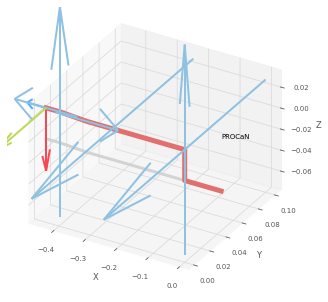

TypeError: list indices must be integers or slices, not NoneType

<Figure size 432x288 with 0 Axes>

In [18]:
procan.plot([0,pi,0,0,-1.57,0])
estendido = procan.fkine([0,pi,0,0,-pi/2,0])
estendido
procan.gravload([0,pi,0,0,-pi/2,0],gravity=[9.81,9.81,9.81])

In [2]:
M = Matrix(Ts.A)
Ms = nsimplify(M,tolerance=1e-4)
#Ms

In [3]:
from sympy import lambdify
from spatialmath import SO3
T_func = lambdify(q, Ms, modules='numpy')
tee = T_func(0,pi/4,0.75*pi,-1.57,0,1.57)
mee = procan.fkine([0,pi/4,0.75*pi,-1.57,0,1.57])
procan.plot([0,pi/4,0.75*pi,-pi/2,0,pi/2])
t_cubo_base = tee * SE3(0.191,0.039,-0.217)
m_cubo_base = mee * SE3(0.191,0.039,-0.217)
#SE3(0.191,0.039,-0.217)
#tee
t_cubo_base = SE3(t_cubo_base)
mee
#Ms[:3,3]

NameError: name 'Ms' is not defined

In [7]:
from spatialmath.base import *
from spatialmath import SE3
import numpy as np
Pa = np.array([[2],[2],[2],[10]])
Pa = Pa/10
I = np.eye(4)
I = np.insert(I,3,[0.2,0.2,0.2,1],axis=1)
Pa = np.delete(I,4,1)
Pa = SE3(0.2,0.2,0.2)
Pc = SE3(-0.167,0.0247,0.4168)
xis,ips,zed = sym.symbol('x,y,z')
Pq = SE3(xis,ips,zed)
#Ms*Pa
#print(Pa)
Pq

   1         0         0        x             
   0         1         0        y             
   0         0         1        z             
   0         0         0         1         


In [ ]:
pose = procan.fkine_all(q)
desloc = pose
#desloc

In [43]:
#https://github.com/petercorke/robotics-toolbox-python/wiki/Kinematics

#sol = procan.ikine_LMS(Pc)
sol = procan.ikine_LMS(m_cubo_base)
sol

IKsolution(q=array([ 0.21184062,  0.52557216, -2.16253715,  1.58239795,  1.63713695,
       -1.79500912]), success=True, reason=None, iterations=15, residual=4.682228218744594e-11)

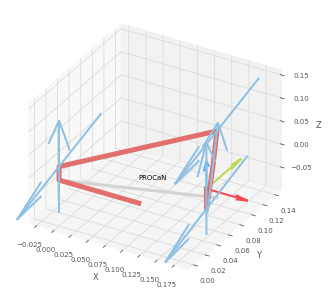

PyPlot3D backend, t = 0.05, scene:
  PROCaN

<Figure size 432x288 with 0 Axes>

In [44]:
procan.plot(sol[0])

In [14]:
#retorna os angulos das juntas em graus
for item in sol[0]:
    print((item/3.1415)*180)

45.00132765349501
57.321969274360484
-79.52102891486904
90.00265441062916
22.199061418637218
-135.0039820809895


In [33]:
J = procan.jacob0(q)
J = nsimplify(J,tolerance=1e-4,rational=True)
J[0]

[-(((-((1234/7169 - 219*sin(ϴ_4)/5000)*sin(ϴ_2) + (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_3)*cos(ϴ_2))*sin(ϴ_1) + ((1234/7169 - 219*sin(ϴ_4)/5000)*cos(ϴ_2) - (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_2)*sin(ϴ_3) + 23/100)*cos(ϴ_1))*sin(ϴ_0) - (219*cos(ϴ_4)/5000 - 19/10000)*cos(ϴ_0)*cos(ϴ_3))*sin(ϴ_0) + ((-((1234/7169 - 219*sin(ϴ_4)/5000)*sin(ϴ_2) + (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_3)*cos(ϴ_2))*sin(ϴ_1) + ((1234/7169 - 219*sin(ϴ_4)/5000)*cos(ϴ_2) - (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_2)*sin(ϴ_3) + 23/100)*cos(ϴ_1))*cos(ϴ_0) + (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_0)*cos(ϴ_3))*cos(ϴ_0))*sin(ϴ_0) - (((-((1234/7169 - 219*sin(ϴ_4)/5000)*sin(ϴ_2) + (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_3)*cos(ϴ_2))*sin(ϴ_1) + ((1234/7169 - 219*sin(ϴ_4)/5000)*cos(ϴ_2) - (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_2)*sin(ϴ_3) + 23/100)*cos(ϴ_1))*sin(ϴ_0) - (219*cos(ϴ_4)/5000 - 19/10000)*cos(ϴ_0)*cos(ϴ_3))*cos(ϴ_0) - ((-((1234/7169 - 219*sin(ϴ_4)/5000)*sin(ϴ_2) + (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_3)*cos(ϴ_2))*sin(ϴ_1) +

In [2]:
import numpy as np
#vector = np.vectorize(np.int_)
#puma = rtb.models.DH.Puma560()
#procan.gravity = [0,0,0]
qd = sym.symbol('ϴd_:6')
qdd = sym.symbol('ϴdd_:6')
z = np.array([[0],[0],[0],[0],[0],[0]])
#z = vector(z)
#qp = np.array([[0.5],[0.5],[0.5],[0.5],[0.5],[0.5]])
qp = np.array([0.5,0.5,0.5,0.5,0.5,0.5])
#qp = vector(qp)
qpp = qp

n = len(qp)

mat = (np.c_[qp] @ np.ones((1,n))).T
#a funcao rne() so aceita entrada de arrays multidimensionais para robos definidos em DH
#tau = procan.rne(mat,0.5+np.zeros((6,)),0.5+np.zeros((6,)))
tau = procan.rne(qp,0.5+np.zeros((6,)),0.5+np.zeros((6,)))
#tauS = procan.rne(q,qd,qdd,symbolic=True,gravity=np.array([0,0,0]))
#%time tau = procan.rne_python(q, qd, qdd)
#pc.robot.accel(qp,0.5 * np.ones(6), np.zeros(6))
#pc.robot.inertia(qp)

In [ ]:
#procan.dynamics()
#procan.coriolis_x(qp,qp)
print(tau)

In [37]:
qr = np.array([0,0,pi,1.57,pi,1.57])
qz = np.zeros((6,))

#procan.inertia(qr)
procan.rne(qr,np.zeros((6,)),3+np.zeros((6,)))

array([ 0.01308664,  0.00601741,  0.026046  , -0.0014515 ,  0.00475777,
        0.00030665])

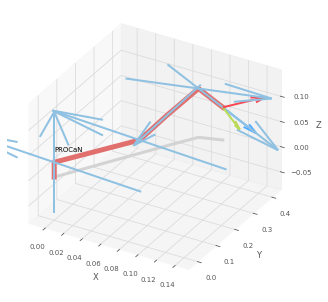

erro em  0 =  [-1.77608151 -3.12837305 -0.44557891 -1.15013366 -2.94503562  2.45523313]


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

<Figure size 432x288 with 0 Axes>

In [16]:
qa = procan.qrandom
procan.plot(qa)
procan.inertia(qa)

In [6]:
import roboticstoolbox as rtb
robot = rtb.models.DH.Puma560()
#print(robot)
#qr = np.array([[0, 0, 0, 0, 0, 0, 0],[0,0,pi,1.57,pi,1.57, 0]])
robot.inertia(robot.qr)

array([[ 2.33735105e+00, -8.29305154e-01, -1.38913810e-01,
         1.64000000e-03, -4.32144000e-04,  4.00000000e-05],
       [-8.29305154e-01,  5.20694800e+00,  7.47899277e-01,
         9.73037481e-19,  3.12932800e-03,  2.44929360e-21],
       [-1.38913810e-01,  7.47899277e-01,  9.38652730e-01,
         5.61100343e-19,  1.88574400e-03,  2.44929360e-21],
       [ 1.64000000e-03,  9.73037481e-19,  5.61100343e-19,
         1.92430626e-01,  2.08189956e-20,  4.00000000e-05],
       [-4.32144000e-04,  3.12932800e-03,  1.88574400e-03,
         2.08189956e-20,  1.71348452e-01,  2.44929360e-21],
       [ 4.00000000e-05,  2.44929360e-21,  2.44929360e-21,
         4.00000000e-05,  2.44929360e-21,  1.94104506e-01]])

In [15]:
robot.coriolis(robot.qz,robot.qr)

array([[-1.11513973e-02, -1.08446419e+00,  1.21430643e-17,
        -2.62271362e-17,  3.40612158e-19, -3.40612158e-19],
       [-4.35983562e-17,  6.06515686e-01,  0.00000000e+00,
         0.00000000e+00,  4.33680869e-17,  0.00000000e+00],
       [ 0.00000000e+00,  6.06515686e-01, -2.72489726e-18,
         0.00000000e+00,  3.22279096e-17,  0.00000000e+00],
       [-3.78155460e-34,  6.47069343e-19, -1.28194712e-33,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.95341718e-03,  2.43945489e-19,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [27]:
import numpy as np
robot.dynamics()

┌──────┬────┬────────────┬────────────────────────┬────┬────┬────────┬────┐
│  j   │ m  │     r      │           I            │ Jm │ B  │   Tc   │ G  │
├──────┼────┼────────────┼────────────────────────┼────┼────┼────────┼────┤
│link1 │  0 │  0,  0,  0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
│link2 │  0 │  0,  0,  0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
│link3 │  0 │  0,  0,  0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
│link4 │  0 │  0,  0,  0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
│link5 │  0 │  0,  0,  0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
│link6 │  0 │  0,  0,  0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
│link7 │  0 │  0,  0,  0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
└──────┴────┴────────────┴────────────────────────┴────┴────┴────────┴────┘



In [9]:
#calculo da focal length:
def FocalLength(measured_distance, real_width, width_in_rf_image):

    focal_length = (width_in_rf_image* measured_distance)/ real_width

    return focal_length
#valores em mm ou px
dist = 100
larg = 56
lpx = 640 #largura em pixels

In [10]:
FocalLength(dist,larg,lpx)

1142.857142857143